# Tidy Survey

This document exhibit the process of cleaning and organizing survey data. First, let's load some packages.

In [121]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**The data processing methods are written as class funciton.** This file also shows my logic behind compsing the class script. 

### 1. read data.

In [113]:
df = survey('data/survey')

### 2. simplify column labels and filter population of interest

In [114]:
df.simp_var()

In [115]:
df.filter()

In [117]:
df.employ()

In [140]:
df.data.columns

Index([u'wrkstat', u'marital', u'sphrs1', u'sphrs2', u'age', u'agekdbrn',
       u'paeduc', u'maeduc', u'speduc', u'degree', u'mawrkgrw', u'incom16',
       u'babies', u'preteen', u'natspac', u'nateduc', u'natarms', u'natfare',
       u'natsoc', u'natpark', u'natfarey', u'eqwlth', u'colath', u'colcom',
       u'spkhomo', u'affrmact', u'wrkwayup', u'hapmar', u'helpful', u'conbus',
       u'coneduc', u'conlabor', u'thnkself', u'workhard', u'helpoth',
       u'satjob', u'richwork', u'class_', u'satfin', u'finrela', u'getahead',
       u'kidssol', u'fepol', u'fechld', u'fepresch', u'fefam', u'helpsick',
       u'discaff', u'fejobaff', u'discaffm', u'discaffw', u'goodlife',
       u'meovrwrk', u'realinc', u'employed'],
      dtype='object')

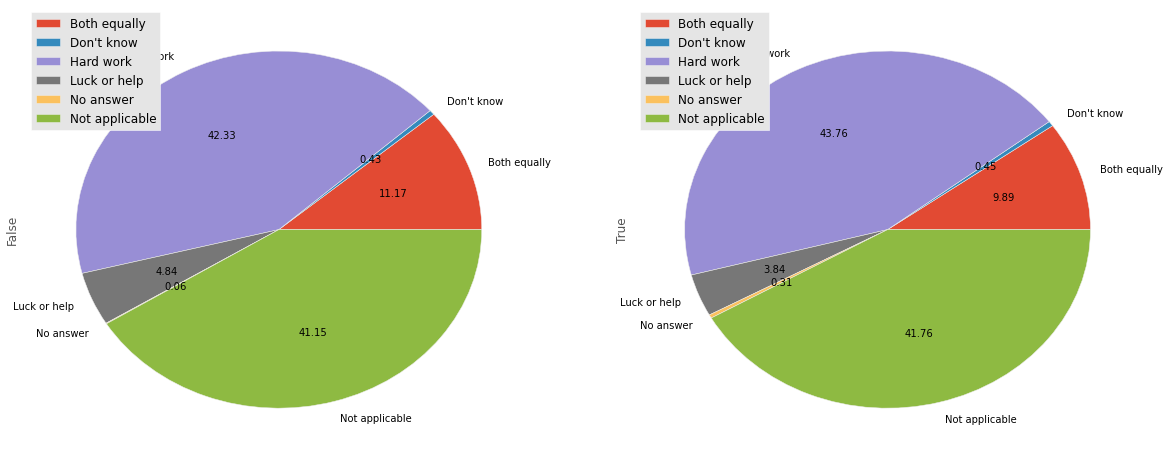

In [168]:
pie_chart(df.data.employed,df.data.getahead)
